# Ejercicios ensembling
En este ejercicio vas a realizar prediciones sobre un dataset de ciudadanos indios diabéticos. Se trata de un problema de clasificación en el que intentaremos predecir 1 (diabético) 0 (no diabético).

### Lee los datos de [esta direccion](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv)
Los nombres de columnas son:
```Python
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
```

In [1]:
import pandas as pd

data = pd.read_csv(
    "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv",
    names=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'])
data

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Bagging
Para este apartado tendrás que crear un ensemble utilizando la técnica de bagging ([BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)), mediante la cual combinarás 100 [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Recuerda utilizar también [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) con 10 kfolds.

**Para este apartado y siguientes, no hace falta que dividas en train/test**, por hacerlo más sencillo. Simplemente divide tus datos en features y target.

Establece una semilla

In [4]:
seed = 42

In [5]:
X = data.drop(columns=["class"])
y = data["class"]

In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier(random_state=seed)

bag_clf = BaggingClassifier(
    estimator = estimator,
    n_estimators=100, # Cantidad de árboles
    random_state=seed)

In [7]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(bag_clf, X, y, cv=10)
sorted(cv_results.keys())

['fit_time', 'score_time', 'test_score']

In [8]:
cv_results["test_score"]

array([0.7012987 , 0.77922078, 0.79220779, 0.66233766, 0.76623377,
       0.79220779, 0.83116883, 0.85714286, 0.72368421, 0.80263158])

In [9]:
cv_results["test_score"].min()

np.float64(0.6623376623376623)

In [10]:
bag = cv_results["test_score"].mean()
bag

np.float64(0.7708133971291866)

### Random Forest
En este caso entrena un [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) con 100 árboles y un `max_features` de 3. También con validación cruzada

In [11]:
from sklearn.ensemble import RandomForestClassifier

rfclass = RandomForestClassifier(random_state=seed , max_features=3, n_estimators=100)
cv_results = cross_validate(rfclass, X, y, cv=10)
rf = cv_results["test_score"].mean()
rf

np.float64(0.768198906356801)

### AdaBoost
Implementa un [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) con 30 árboles.

In [12]:
from sklearn.ensemble import AdaBoostClassifier

estimator = DecisionTreeClassifier()

ada_clf = AdaBoostClassifier(estimator = estimator,
                             n_estimators=30,
                             algorithm="SAMME",
                             random_state=seed)

cv_results = cross_validate(ada_clf, X, y, cv=10)
ada = cv_results["test_score"].mean()
ada

np.float64(0.6990772385509229)

Sobre SAMME y SAMME.R... https://medium.datadriveninvestor.com/understanding-adaboost-and-scikit-learns-algorithm-c8d8af5ace10

### GradientBoosting
Implementa un [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) con 100 estimadores

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

misupermodelo = GradientBoostingClassifier(n_estimators=100,random_state=seed)

cv_results = cross_validate(misupermodelo, X, y, cv=10)
grad = cv_results["test_score"].mean()
grad

np.float64(0.7604066985645933)

### XGBoost
Para este apartado utiliza un [XGBoostClassifier](https://docs.getml.com/latest/api/getml.predictors.XGBoostClassifier.html) con 100 estimadores. XGBoost no forma parte de la suite de modelos de sklearn, por lo que tendrás que instalarlo con pip install

In [14]:
import xgboost

xgb_clas = xgboost.XGBClassifier(random_state=seed , booster='gbtree', n_estimators=100)

In [15]:
cv_results = cross_validate(xgb_clas, X, y, cv=10)
xgb = cv_results["test_score"].mean()
xgb

np.float64(0.7434723171565276)

In [16]:
cv_results["test_score"]

array([0.72727273, 0.75324675, 0.71428571, 0.68831169, 0.7012987 ,
       0.79220779, 0.76623377, 0.81818182, 0.69736842, 0.77631579])

In [17]:
import lightgbm as lgb

model = lgb.LGBMClassifier(n_estimators=100, verbose=-1, random_state=seed)
cv_results = cross_validate(model, X, y, cv=10)
lgbm = cv_results["test_score"].mean()
lgbm

np.float64(0.7409432672590568)

### Primeros resultados
Crea un dataframe con los resultados y sus algoritmos, ordenándolos de mayor a menor

In [18]:
pd.DataFrame({"cv_mean_accuracy" : [bag, rf, ada, grad, xgb, lgbm]}, index=["Bagging","RandomForest", "AdaBoosting", "GradientBoosting", "XGB", "LGB"])

,cv_mean_accuracy
Bagging,0.770813
RandomForest,0.768199
AdaBoosting,0.699077
GradientBoosting,0.760407
XGB,0.743472
LGB,0.740943


### Hiperparametrización
Vuelve a entrenar los modelos de nuevo, pero esta vez dividiendo el conjunto de datos en train/test y utilizando un gridsearch para encontrar los mejores hiperparámetros.

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [20]:
from sklearn.model_selection import GridSearchCV

# Variad entre varios parámetros
param_grid = {'n_estimators': [50, 100, 200, 300],
              'max_features': [2,3,4, 5, 6, 7, 8]}

bag_grid = GridSearchCV(bag_clf, param_grid, cv=10)
bag_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                         n_estimators=100, random_state=42),
             param_grid={'max_features': [2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [50, 100, 200, 300]})

In [21]:
bag_grid.best_score_

np.float64(0.7736118455843468)

In [22]:
bag_grid.best_params_

{'max_features': 5, 'n_estimators': 200}

In [23]:
bag_grid.best_estimator_.score(X_test, y_test)

0.7337662337662337

In [24]:
# Variad entre varios parámetros
param_grid = {'n_estimators': [50, 100, 200, 300],
              'max_features': [2,3,4, 5, 6, 7, 8]}

rf_grid = GridSearchCV(rfclass, param_grid, cv=10)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_features=3, random_state=42),
             param_grid={'max_features': [2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [50, 100, 200, 300]})

In [25]:
rf_grid.best_estimator_.score(X_test, y_test)

0.7727272727272727

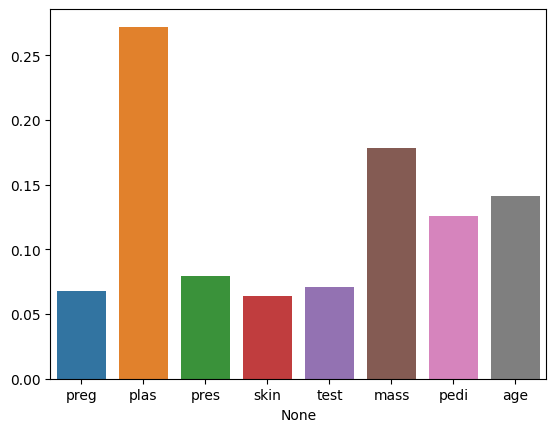

In [26]:
import seaborn as sns

sns.barplot(x=X.columns, y=rf_grid.best_estimator_.feature_importances_, hue=X.columns);

In [45]:
seed = 42

X = data[["plas", "mass", "age", "pedi", "pres"]]
y = data["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Variad entre varios parámetros
param_grid = {'n_estimators': [50, 100, 200, 300]}

rf_grid = GridSearchCV(rfclass, param_grid, cv=10)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_features=3, random_state=42),
             param_grid={'n_estimators': [50, 100, 200, 300]})

In [46]:
rf_grid.best_estimator_.score(X_test, y_test)

0.7662337662337663

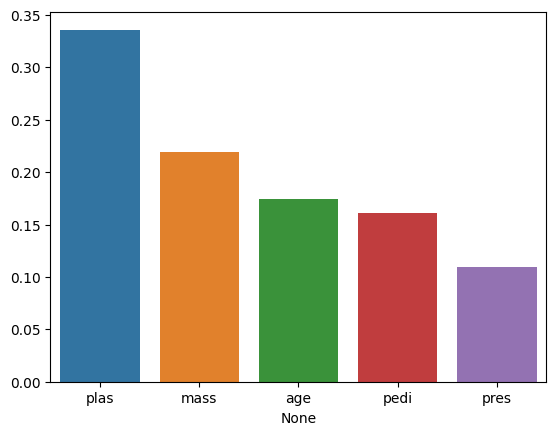

In [44]:
sns.barplot(x=X.columns, y=rf_grid.best_estimator_.feature_importances_, hue=X.columns);

### Conclusiones finales

Redacta la información relativa a qué atributos parecen ser los más importantes, qué modelo parece ofrecer un mejor rendimiento y con qué parámetros.